# License Plate Detection and Recognition

This notebook was developed based on "[Detect and Recognize Vehicle’s License Plate with Machine Learning and Python](https://github.com/quangnhat185/Plate_detect_and_recognize)" by Quang Nguyen. Using:


* [License Plate Detection and Recognition in Unconstrained Scenarios](https://github.com/sergiomsilva/alpr-unconstrained). WPOD-NET for plate detection
* MobileNetV2 model + License character recognition weights [pre-trained](https://medium.com/@quangnhatnguyenle/detect-and-recognize-vehicles-license-plate-with-machine-learning-and-python-part-3-recognize-be2eca1a9f12). For plate recognition
* Color analisys. For plate type classification, according to ecuadorian plates
* Circulation restriction, according to plate's last digit and date-time
* Basic information about the vehicle, according to ecuadorian ANT


**All the required data is available at the [link](https://drive.google.com/drive/folders/1ydqqV2Hj7QhUCTKRHrjNp58FdcVw1F6x?usp=sharing) and must be copied to the root of the personal Google Drive account.**

In [ ]:
#@markdown ##Linking Colab with Google Drive {display-mode: "form", vertical-output: true}
 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#@markdown ##Loading main module (Run once | it may take a while) {display-mode: "form", vertical-output: true}
print("Loading...")
from IPython.display import clear_output
from IPython.display import Image as Im
from importlib.machinery import SourceFileLoader
from google.colab import files
!pip install kora -q
notebooksPath = "/content/drive/MyDrive/LPDR/";
utilsLPDR = SourceFileLoader("utilsLPDR", notebooksPath+"utilsLPDR_enh.py").load_module();
clear_output()
print("Imported Module!")

Imported Module!


Processing...
Plate type: comercial
7 chars detected
Recognized plate: TAA3504


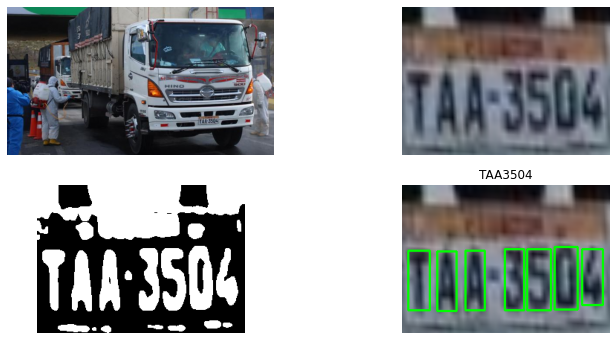

In [ ]:
# @title ##**License Plate Detection and Recognition System** { display-mode: "form", run: "auto", vertical-output: true}
#@markdown ---
#@markdown ### Choose between loading a DB's image or a new image:
mpath = "";
Path = "DataBase" #@param ["DataBase", "Root"]
#@markdown ---
#@markdown ### If "DataBase" was selected, enter the image name:
if Path == "Root":
  uploaded = files.upload()
  for a in uploaded:
    Image = a;
else:
  Image = 'camion1.jpeg' #@param ["LBB9005.jpg", "GSR3885.jpg", "SMA1072.jpeg", "taxi1.jpg", "XBA6956.jpg", "SAD045.jpg", "buseta1.jpg", "camion1.jpeg"] {allow-input: true}
  mpath = notebooksPath + "DB/";
#@markdown ---
#@markdown ### Special feature to pick out among "day" or "night" illumination (beta):
Day = True #@param {type:"boolean"}

print("Processing...")
[vehicle, vehicle_plate, plate_type] = utilsLPDR.stage1(mpath, Image)
[thre_mor, test_roi, crop_characters, final_string] = utilsLPDR.stage2(vehicle_plate, Day)
utilsLPDR.is_printed(vehicle, vehicle_plate, thre_mor, test_roi, final_string)

The car with plate number TAA3504 CAN be on the road
the day 2021-07-11 at 10:24:20, according to "No circula" schedule
           Information          


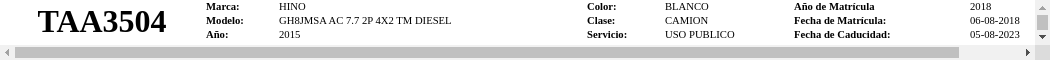

In [ ]:
# @title ##**Information & Circulation Restriction**{ display-mode: "form", vertical-output: false}
# run: "auto" 
 
#@markdown ### If the plate was **NOT** properly detected, please, correct in the below text-box. Otherwise **let it in blank**:
#@markdown ---
Correct = "" #@param {type:"string"}
#@markdown >_caps characters without dash_.
if Correct:
  verified_plate = Correct;
else:
  verified_plate = final_string;
WhereToSearch = 'ANT' #@param ['DB', 'ANT'] {allow-input: false}

#@markdown ### **Restriction validation**:
#@markdown ---
DateTime = 'current' #@param ['current', '21/07/19 08:55:19', '21/7/8 8:0:19'] {allow-input: true}
#@markdown >_format: YY/MM/DD HH:MM:SS_.
RestrictionType = "No circula" #@param ["Pico y Placa", "No circula"]

_,_,_ = utilsLPDR.vehicular_traffic_restriction(RestrictionType, DateTime, verified_plate)

#===================================================
print("================================")
print("           Information          ")
print("================================")
wd, ant_info = utilsLPDR.information(verified_plate, WhereToSearch)
Im(ant_info,height=80)